In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import sin, diff
from sympy.abc import x

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras.losses import BinaryCrossentropy # type: ignore
from tensorflow.keras.activations import relu, sigmoid # type: ignore
from tensorflow.keras.optimizers.legacy import Adam, RMSprop # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore
from tensorflow.keras.applications.resnet50 import ResNet50 # type: ignore
from tensorflow.keras.applications.imagenet_utils import decode_predictions # type: ignore
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore
from tensorflow.keras.datasets import imdb # type: ignore
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## Question 6

### 6.a

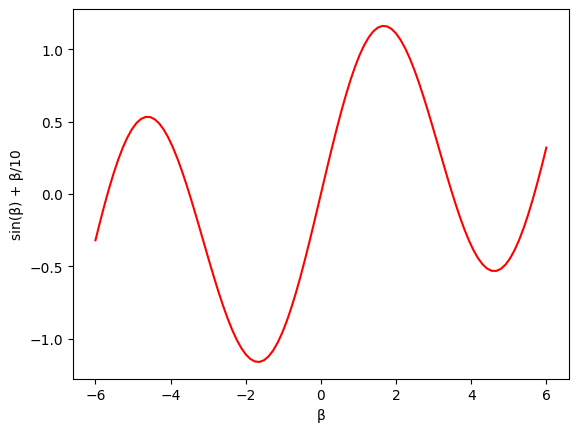

In [90]:
betas = np.linspace(-6, 6, 100)
r_beta = np.sin(betas) + betas/10

plt.plot(betas, r_beta, 'r-')
plt.xlabel('β')
plt.ylabel('sin(β) + β/10')
plt.show()

### 6.b

In [91]:
# The derivative of the function
eq = sin(x) + x/10
diff(eq,x)

cos(x) + 1/10

### 6.c

In [92]:
def gradient_descent(x_init, dx, learning_rate):
    beta = x_init
    step = []

    for i in range(100):
        gradient = dx.evalf(subs={x:beta})
        if abs(gradient) > 0.1:
            step.append(beta)
            beta = beta - learning_rate * float(gradient)

    return step

In [93]:
dx = diff(eq, x)
beta = 2.3
learning_rate = 0.1

step = gradient_descent(beta, dx, learning_rate)

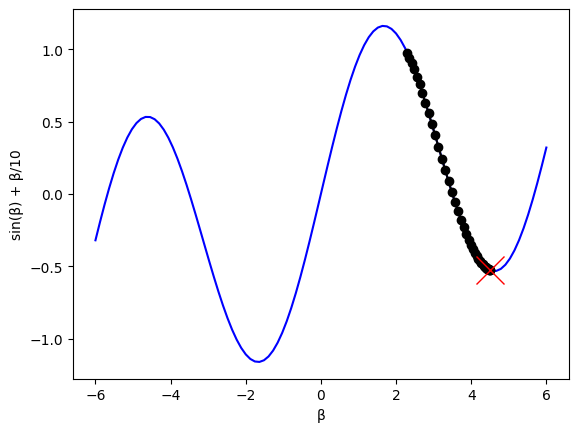

In [94]:
step = np.array(step)
response = np.sin(step) + step/10

plt.plot(betas, r_beta, 'b')
plt.plot(step, response, 'k', marker='o')
plt.plot(step[np.argmin(response)], np.min(response), 'r', marker='x', markersize=20)
plt.xlabel('β')
plt.ylabel('sin(β) + β/10')
plt.show()

### 6.d

In [95]:
dx = diff(eq, x)
beta = 1.4
learning_rate = 0.1

step = gradient_descent(beta, dx, learning_rate)

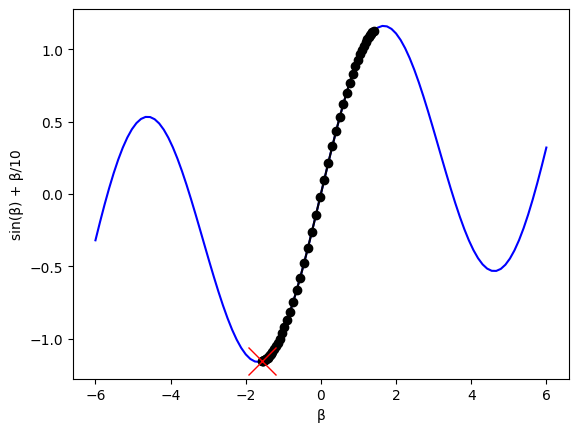

In [96]:
step = np.array(step)
response = np.sin(step) + step/10

plt.plot(betas, r_beta, 'b')
plt.plot(step, response, 'k', marker='o')
plt.plot(step[np.argmin(response)], np.min(response), 'r', marker='x', markersize=20)
plt.xlabel('β')
plt.ylabel('sin(β) + β/10')
plt.show()

## Question 7

In [97]:
default = pd.read_csv('../../data/default.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [98]:
# checking for missing values
default.isna().any()

default    False
student    False
balance    False
income     False
dtype: bool

In [99]:
# one hot encode
default = pd.get_dummies(default)
default.drop(['default_No', 'student_No'], axis=1, inplace=True)
default.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


In [100]:
X = default.drop(['default_Yes'], axis=1)
y = default['default_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [101]:
# Build Neural Network

model = Sequential(
    [
        Dense(units=10, activation='relu', input_shape=(3,)),
        Dropout(0.4),
        Dense(units=1, activation='sigmoid')
    ]
)

model.summary()

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [102]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics

model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),  # This uses the Keras 3 optimizer
    metrics=[metrics.BinaryAccuracy(name='accuracy')]
)

history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3827 - loss: 3220.0574 - val_accuracy: 0.9736 - val_loss: 36.2364
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6592 - loss: 1271.6871 - val_accuracy: 0.9736 - val_loss: 105.7890
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8073 - loss: 687.6552 - val_accuracy: 0.9736 - val_loss: 134.8611
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8375 - loss: 580.0347 - val_accuracy: 0.9736 - val_loss: 148.4042
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8558 - loss: 481.7116 - val_accuracy: 0.9736 - val_loss: 157.5967
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8838 - loss: 380.7531 - val_accuracy: 0.9736 - val_loss: 160.3424
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9063 - loss: 373.4137 - val_accuracy: 0.9736 - val_loss: 152.6001
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9042 - loss: 337.5631 - v

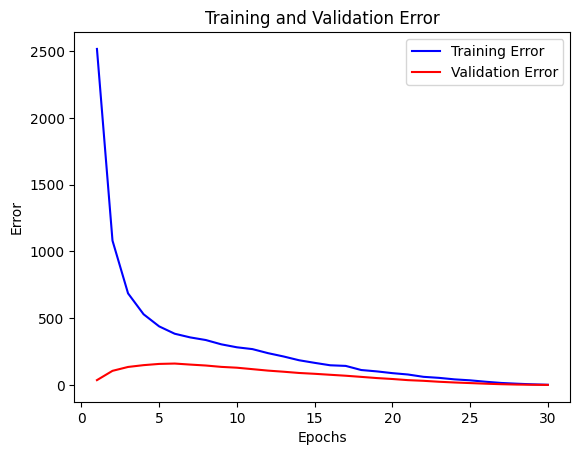

In [103]:
train_errors = history.history['loss']
val_errors = history.history['val_loss']

epochs = np.arange(1, len(train_errors)+1)
plt.plot(epochs, train_errors, 'b-', label='Training Error')
plt.plot(epochs, val_errors, 'r-', label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Validation Error')
plt.legend()
plt.show()

In [104]:
# NN - Test set error
print('NN - Test set accuracy', model.evaluate(X_test, y_test)[1])

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9624 - loss: 1.1339
NN - Test set accuracy 0.9623333215713501


In [105]:
# Fit Logistic Regression model

logit = LogisticRegression(fit_intercept=True)
logit.fit(X_train, y_train)

print('Logistic Reg. - Test set accuracy', logit.score(X_test, y_test))

Logistic Reg. - Test set accuracy 0.9723333333333334


## Question 8

In [106]:
# img_dir = '../../data/exercise_images'
# image_names = os.listdir(img_dir)[2:]
# num_images = len(image_names)

# x = np.zeros((num_images, 224, 224, 3))

# for i in range(num_images):
#     img_path = os.path.join(img_dir, image_names[i])
#     img = Image.open(img_path)
#     img = img.resize((224, )*2, resample=Image.LANCZOS)
#     x[i] = np.array(img)

# x = x / 255.0

In [107]:
# model = ResNet50(weights='imagenet')

# y_pred = model.predict(x)

# decoded_pred = decode_predictions(y_pred)

# pred_dict = {image_names[i]: decoded_pred[i] for i in range(num_images)}
# pred_dict

# ## TODO

## Question 9-12

Unfortunately, I was unable to access the NYSE dataset used in the time series prediction section of the ISLR book.

## Question 13
We achieved a test accuracy of 0.8414 when we set MAX_FEATURES to 10000.

In [108]:
INDEX_FROM = 3

word_index = imdb.get_word_index()
word_index = {k:(v+INDEX_FROM) for k,v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

def decode_review(text, word_index):
    idx_to_word = {value:key for key, value in word_index.items()}
    words = [idx_to_word[i] for i in text]
    return ' '.join(words)

In [109]:
def get_dataset(MAX_FEATURES=10000, INDEX_FROM=3):
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=MAX_FEATURES, index_from=INDEX_FROM)

    tokenizer = Tokenizer(num_words=MAX_FEATURES)

    X_train_1h = tokenizer.sequences_to_matrix(X_train, mode='binary')
    X_test_1h = tokenizer.sequences_to_matrix(X_test, mode='binary')

    return (X_train_1h, y_train), (X_test_1h, y_test)

In [110]:
from keras.models import Sequential
from keras.layers import Dense, Input  # Add Input layer
from keras.optimizers import RMSprop
from keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split

def cases(max_feature_list):
    test_accuracy_scores = []

    for max_ftr in max_feature_list:
        (X_train, y_train), (X_test, y_test) = get_dataset(MAX_FEATURES=max_ftr)

        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2000, random_state=3)

        model = Sequential(
            [
                Input(shape=(max_ftr,)),  # Add explicit Input layer
                Dense(units=16, activation='relu'),
                Dense(units=16, activation='relu'),
                Dense(units=1, activation='sigmoid')
            ]
        )

        model.compile(
            loss=BinaryCrossentropy(),
            optimizer=RMSprop(),
            metrics=['accuracy']
        )

        model.fit(X_train, y_train, epochs=20, batch_size=512,
                  validation_data=(X_val, y_val), verbose=0)

        test_accuracy_scores.append(model.evaluate(X_test, y_test, verbose=0)[1])

    return test_accuracy_scores

max_feature_list = [1000, 3000, 5000, 10000]
results = cases(max_feature_list)

In [111]:
df = pd.DataFrame({'Max Feature Num': max_feature_list, 'Test Set Accuracy': results})
df = df.sort_values(by='Test Set Accuracy', ascending=False)
df

,Max Feature Num,Test Set Accuracy
1,3000,0.86264
3,10000,0.85656
2,5000,0.85520
0,1000,0.85484
